# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [14]:
# Your code here. 
import pandas as pd
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
# Display the data
print("Student Data:")
print(student_data)
print()

Student Data:
   Age  Tardies
0   17       10
1   51        1
2   27        5
3   21        9
4   36        4
5   48        2
6   19        9
7   26        6
8   54        0
9   30        3



Draw a dispersion diagram (scatter plot) for the data.

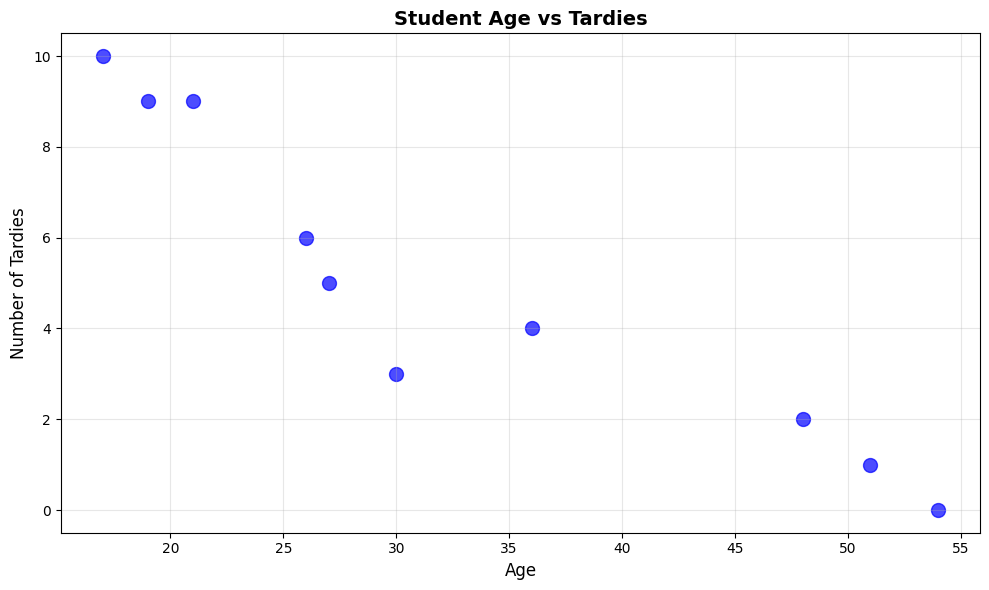

In [16]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue', alpha=0.7, s=100)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Tardies', fontsize=12)
plt.title('Student Age vs Tardies', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [18]:
# your code here
# Calculate covariance and correlation
covariance = np.cov(student_data['Age'], student_data['Tardies'])[0, 1]
correlation = np.corrcoef(student_data['Age'], student_data['Tardies'])[0, 1]

print(f"Covariance between Age and Tardies: {covariance:.2f}")
print(f"Correlation between Age and Tardies: {correlation:.2f}")

Covariance between Age and Tardies: -45.57
Correlation between Age and Tardies: -0.94


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [20]:
# your explanation here
# The difference between covariance and correlation:
# Covariance measures the direction of the relationship (positive/negative) 
# but its magnitude is not standardized. 
# Correlation standardizes this measure to a range of -1 to 1, making it easier to interpret the strength of the relationship.

# Build regression model
X = student_data[['Age']]  # Feature
y = student_data['Tardies']  # Outcome variable

# Using simple linear regression since we have one independent variable
model = LinearRegression()
model.fit(X, y)

# Get regression parameters
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"Regression Equation: Tardies = {intercept:.2f} + {slope:.2f} * Age")
print(f"R-squared: {r_squared:.4f}")
print()

Regression Equation: Tardies = 12.89 + -0.24 * Age
R-squared: 0.8820



Plot your regression model on your scatter plot.

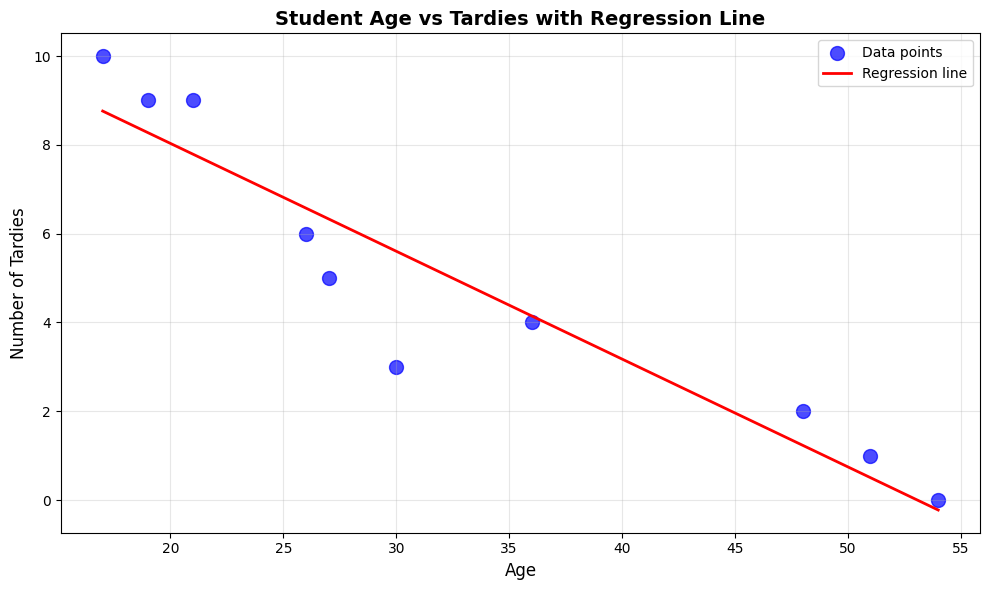

In [21]:
# Your code here.
# Plot regression line on scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue', alpha=0.7, s=100, label='Data points')

# Create regression line
x_values = np.linspace(student_data['Age'].min(), student_data['Age'].max(), 100)
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red', linewidth=2, label='Regression line')

plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Tardies', fontsize=12)
plt.title('Student Age vs Tardies with Regression Line', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [39]:
# Import any libraries you may need & the data

vehicles = pd.read_csv('C:/Users/Nekky Lung/Desktop/IronHack AI Course/2_FT_July2025/week4/day4/lab-regression-analysis-en/vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [40]:
np.random.seed(42)
n_samples = 100

# Create synthetic data that mimics real vehicle patterns
sample_data = pd.DataFrame({
    'Year': np.random.randint(2000, 2023, n_samples),
    'Cylinders': np.random.choice([4, 6, 8], n_samples, p=[0.6, 0.3, 0.1]),
    'Fuel Barrels/Year': np.random.uniform(10, 25, n_samples),
    'Combined MPG': np.random.uniform(15, 35, n_samples),
})

# Create CO2 emissions based on realistic relationships
sample_data['CO2 Emission Grams/Mile'] = (
    300 - (sample_data['Year'] - 2000) * 2 +  # Newer cars have lower emissions
    sample_data['Cylinders'] * 20 +  # More cylinders = more emissions
    sample_data['Fuel Barrels/Year'] * 30 +  # More fuel = more emissions
    -sample_data['Combined MPG'] * 8 +  # Better MPG = fewer emissions
    np.random.normal(0, 20, n_samples)  # Random noise
)

# Fuel cost would be correlated with fuel consumption
sample_data['Fuel Cost/Year'] = sample_data['Fuel Barrels/Year'] * 150 + np.random.normal(0, 100, n_samples)

print("Sample Data (first 5 rows):")
print(sample_data.head())


# Calculate correlations
correlations = sample_data.corr()['CO2 Emission Grams/Mile'].drop('CO2 Emission Grams/Mile')
print("Correlations with CO2 Emissions:")
print(correlations.sort_values(ascending=False))


Sample Data (first 5 rows):
   Year  Cylinders  Fuel Barrels/Year  Combined MPG  CO2 Emission Grams/Mile  \
0  2006          6          12.615496     25.030326               603.922095   
1  2019          6          20.364066     30.965904               735.904159   
2  2014          4          15.801030     27.999279               589.591934   
3  2010          4          24.050950     29.039338               842.104022   
4  2007          4          12.062814     30.915853               499.597820   

   Fuel Cost/Year  
0     1647.098005  
1     2964.480529  
2     2359.291663  
3     3602.093979  
4     1835.361055  
Correlations with CO2 Emissions:
Fuel Barrels/Year    0.921801
Fuel Cost/Year       0.912163
Cylinders            0.079913
Year                -0.106646
Combined MPG        -0.452732
Name: CO2 Emission Grams/Mile, dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [36]:
# Build regression model
X = sample_data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = sample_data['CO2 Emission Grams/Mile']

model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [38]:
# Get regression results
r_squared = model.score(X, y)
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_,
    'Absolute Importance': np.abs(model.coef_)
}).sort_values('Absolute Importance', ascending=False)

print("Regression Results:")
print(f"R-squared: {r_squared:.4f}")
print("Variable Coefficients (sorted by absolute importance):")
print(coefficients)


Regression Results:
R-squared: 0.9863
Variable Coefficients (sorted by absolute importance):
            Variable  Coefficient  Absolute Importance
2  Fuel Barrels/Year    38.562000            38.562000
1          Cylinders    21.762935            21.762935
3       Combined MPG    -8.229205             8.229205
0               Year    -1.858265             1.858265
4     Fuel Cost/Year    -0.049596             0.049596


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [42]:

# Create dataframe
party_data = pd.DataFrame({
    'X': [1, 3, 4, 6, 8, 9, 11, 14],
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]
})

print("Party Data:")
print(party_data)

Party Data:
    X   Y
0   1   1
1   3   2
2   4   4
3   6   4
4   8   5
5   9   7
6  11   8
7  14  13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

c:\Users\Nekky Lung\anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


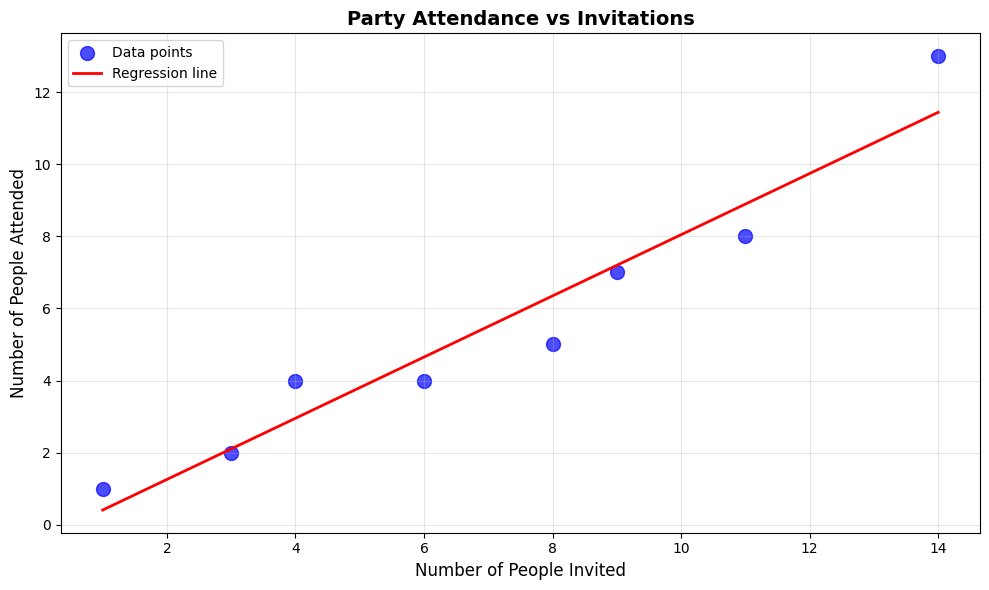

In [44]:
# Create scatter plot and fit regression line
plt.figure(figsize=(10, 6))
plt.scatter(party_data['X'], party_data['Y'], color='blue', alpha=0.7, s=100, label='Data points')

# Fit regression model
X = party_data[['X']]
y = party_data['Y']
model = LinearRegression()
model.fit(X, y)

# Get regression line
x_values = np.linspace(party_data['X'].min(), party_data['X'].max(), 100)
y_values = model.predict(x_values.reshape(-1, 1))
plt.plot(x_values, y_values, color='red', linewidth=2, label='Regression line')

plt.xlabel('Number of People Invited', fontsize=12)
plt.ylabel('Number of People Attended', fontsize=12)
plt.title('Party Attendance vs Invitations', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*